# Import Dataset

In [ ]:
from google.colab import files
import pandas as pd
import numpy as np
import math
# Visualization Library
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis

In [ ]:
files.upload()

Saving youtube_statistics.xlsx to youtube_statistics.xlsx


In [ ]:
df = pd.read_excel('youtube_statistics.xlsx')
df.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
0,2017-11-14,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,12:20:39,"sharry mann|""sharry mann new song""|""sharry man...",1096327,33966,798,882,False,False,False,Presenting Sharry Mann latest Punjabi Song Cu...,15,920,81,2017-11-12
1,2017-11-14,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,05:43:56,"पीरियड्स के समय|""पेट पर पति करता ऐसा""|""देखकर द...",590101,735,904,0,True,False,False,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",19,2232,58,2017-11-13
2,2017-11-14,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,15:48:08,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,473988,2011,243,149,False,False,False,Watch Stylish Star Allu Arjun @ ChaySam Weddin...,14,482,58,2017-11-12
3,2017-11-14,Eruma Saani | Tamil vs English,Eruma Saani,23,07:08:48,"Eruma Saani|""Tamil Comedy Videos""|""Films""|""Mov...",1242680,70353,1624,2684,False,False,False,This video showcases the difference between pe...,20,263,30,2017-11-12
4,2017-11-14,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,01:14:16,"Filmylooks|""latest news""|""telugu movies""|""telu...",464015,492,293,66,False,False,False,why Samantha became EMOTIONAL @ Samantha naga ...,11,753,88,2017-11-13


# EDA and Preprocessing

## Descriptive Statistics

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36791 entries, 0 to 36790
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           36791 non-null  object        
 1   title                   36791 non-null  object        
 2   channel_title           36791 non-null  object        
 3   category_id             36791 non-null  int64         
 4   publish_time            36791 non-null  object        
 5   tags                    36791 non-null  object        
 6   views                   36791 non-null  int64         
 7   likes                   36791 non-null  int64         
 8   dislikes                36791 non-null  int64         
 9   comment_count           36791 non-null  int64         
 10  comments_disabled       36791 non-null  bool          
 11  ratings_disabled        36791 non-null  bool          
 12  video_error_or_removed  36791 non-null  bool  

In [ ]:
print(f'Terdapat {df.shape[0]} baris data dan {df.shape[1]} kolom didalam dataset')

Terdapat 36791 baris data dan 18 kolom didalam dataset


###### **Notes** : Perubahan yang sebaiknya dilakukan
1. **trending_date**: Memungkinkan untuk dilakukan perubahan tipe data menjadi datetime untuk mempermudah pengambilan tgl, bln, thn.

2. **publish_time**: Memungkinkan untuk dilakukan perubahan tipe data menjadi datetime.now untuk mempermudah pengambilan jam, menit, detk.

##### **Notes** : Penambahan kolom
1. day_tranding
2. month_tranding
3. hour_publish
4. day_publish
5. month_publish
6. day_for_trending

## Missing Value

In [ ]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

In [ ]:
df[df['tags'] == '[none]']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date
67,2017-11-14,"Mission IAS 2018 : 13 November, 2017 The Hindu...",only ias,27,03:13:24,[none],23114,0,0,0,True,True,False,Answer Writing == http://www.onlyias.com/2017/...,1,348,73,2017-11-13
87,2017-11-14,ലൈവിൽ വന്നു ഭാരിയക്ക്‌ പാട്ടു പാടി കൊടുത്തു ച...,Malayalam Media,24,01:53:12,[none],209606,3739,118,245,False,False,False,കോർട്ടസി : KunchackoBoban\n🥁ഭാര്യക്കു ഒരു പാട്...,1,177,95,2017-11-13
124,2017-11-14,ഇടുക്കി ആശുപത്രിയിൽ രോഗികളെ ക്യൂവിൽ നിർത്തിയ ജ...,Malayalam News Time,22,11:04:59,[none],197122,0,0,130,False,True,False,ഇടുക്കി ആശുപത്രിയിൽ രോഗികളെ ക്യൂവിൽ നിർത്തിയ ജ...,1,95,95,2017-11-12
144,2017-11-14,ഓട്ടോ ഡ്രൈവർമാർ ഒരു വശം ചെരിഞ്ഞിരിക്കുന്നതിന്റ...,citizen journalist,24,02:37:43,[none],23082,31,12,7,False,False,False,ഓട്ടോ ഡ്രൈവർമാർ ഒരു വശം ചെരിഞ്ഞിരിക്കുന്നതിന്റ...,1,2138,100,2017-11-13
155,2017-11-14,जनरल जीडी बख्शी ने बोला Pok हमारा है ऋषि कपूर ...,Modi again in 2019,25,14:08:33,[none],69459,351,70,190,False,False,False,Farooq Abdullah and Rishi Kapoor latest contro...,1,71,73,2017-11-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36396,2018-06-12,മഞ്ജുവിനെ ആശ്വസിപ്പിക്കാൻ ദിലീപ് മീനാക്ഷിക്കൊപ...,Entertainment Journalist,24,18:21:38,[none],102191,80,54,8,False,False,False,മഞ്ജുവിനെ ആശ്വസിപ്പിക്കാൻ ദിലീപ് മീനാക്ഷിക്കൊപ...,1,98,98,2018-06-10
36509,2018-06-13,RABB JANE (Full Video) Afsana Khan ft Garry Sa...,Fresh Media Records,10,04:19:27,[none],607257,13400,512,1031,False,False,False,LISTEN ON https://gaana.com/song/rabb-jane-unp...,1,145,77,2018-06-12
36551,2018-06-13,my FaVoriTE CELL PhonEs! (tech tuesday intro b...,CaseyNeistat,22,15:23:28,[none],753230,32170,667,3831,False,False,False,follow me on Twitter - https://twitter.com/Cas...,1,150,57,2018-06-12
36664,2018-06-14,Indore Preview- Chacha Vidhayak Hai Humare - Z...,Zakir Khan,22,14:18:31,[none],274861,16448,183,834,False,False,False,"Suno, Sab sort karva denge. Chacha vidhayak ha...",1,237,55,2018-06-13


In [ ]:
# Handling None in the 'tags' column replace it with 'No Tags'
df['tags'] = df['tags'].replace('[none]', 'No Tags')


In [ ]:
df[df['tags'] == '[none]']

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,description,No_tags,desc_len,len_title,publish_date


In [ ]:
# duplicated data
df.duplicated().sum()

4229

Notes:
1. Terdapat 1 kolom yang memiliki nilai null yaitu description sebanyak 45 dan terdapat 1 kolom yang mengandung None value yaitu tags sebanyak 1120. Setelah dilakukan pengecekan menggunakan metode lainnya, kolom selebihnya tidak ada yang mengandung missing value.
2. Pada kolom tags terdapat nilai None, tetapi hal ini tidak akan dilakukan penghapusan melainkan replace nilai, karena nilai None pada tags tetap memiliki makna dan dapat digunakan untuk melakukan prediksi
3. Terdapat 4229 data duplicate.

### Data Summary

In [ ]:
num = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']
cats = ['trending_date', 'publish_time', 'title', 'channel_title', 'tags', 'description', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']

In [ ]:
# Numerical Summary
round(df[num].describe(),2).T

,count,mean,std,min,25%,50%,75%,max
views,36791.0,1071490.26,3207149.05,4024.0,125604.0,307836.0,806631.5,125432237.0
likes,36791.0,27450.69,97831.29,0.0,879.0,3126.0,14095.0,2912710.0
dislikes,36791.0,1685.36,16197.32,0.0,109.0,331.0,1032.0,1545017.0
comment_count,36791.0,2714.02,14978.11,0.0,83.0,336.0,1314.5,827755.0
No_tags,36791.0,18.94,9.84,1.0,12.0,19.0,25.0,72.0
desc_len,36791.0,923.08,815.04,3.0,368.0,677.0,1237.0,5136.0
len_title,36791.0,70.61,22.41,5.0,53.0,74.0,91.0,100.0


Notes:
1. Terdapat perbedaan yang sangan signifikan antara min dan max pada data numerik sehingga data numerik kemungkinan memiliki outlier.
2. Terdapat perbedaan yang sangan signifikan antara mean dan median pada data numerik sehingga data numerik kemungkinan memiliki distribusi tidak normal atau skewed.


In [ ]:
# Categorical Summary
round(df[cats].describe(),2).T

,count,unique,top,freq
trending_date,36791,205,2017-12-23,199
publish_time,36791,12375,04:30:00,333
title,36791,16431,Mission: Impossible - Fallout (2018) - Officia...,19
channel_title,36791,1390,VikatanTV,284
tags,36791,12463,No Tags,1120
description,36746,13979,Subscribers Link: http://bit.ly/2qb69dZ\n\nCon...,166
comments_disabled,36791,2,False,35611
ratings_disabled,36791,2,False,36034
video_error_or_removed,36791,2,False,36780


# Univariate Analysis

Hisplot NUM

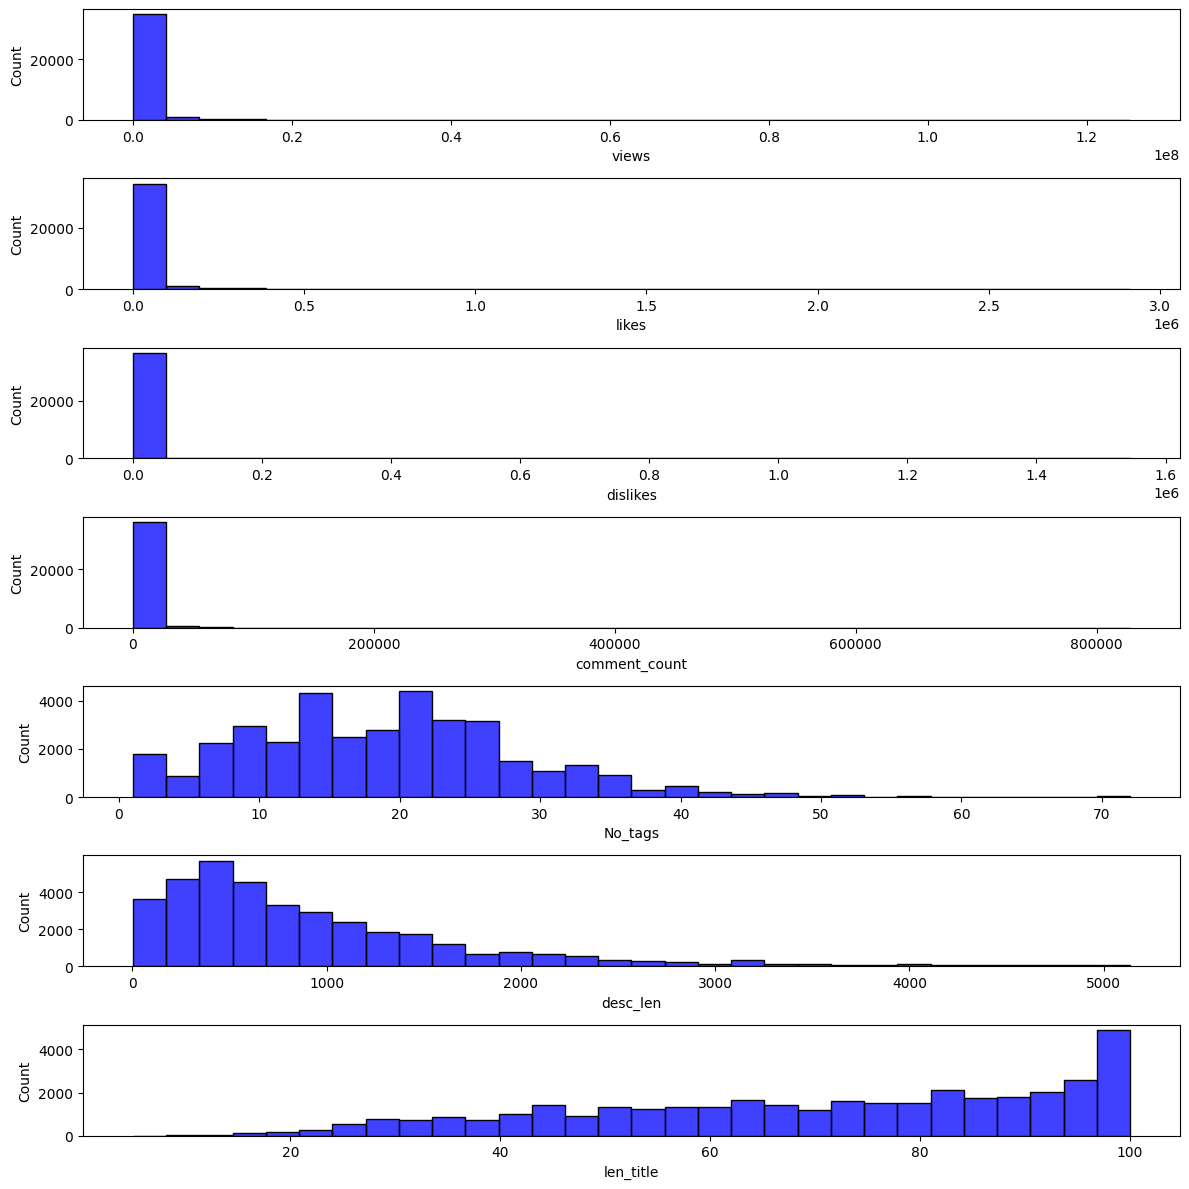

In [ ]:
# Data distribution (visualized in displot)
plt.figure(figsize=(12, 12))

for i in range(0, len(num)):
    plt.subplot(len(num), 1, i+1)
    sns.histplot(data=df, x=df[num[i]], color='blue', bins=30)

plt.tight_layout()

DISTPLOT

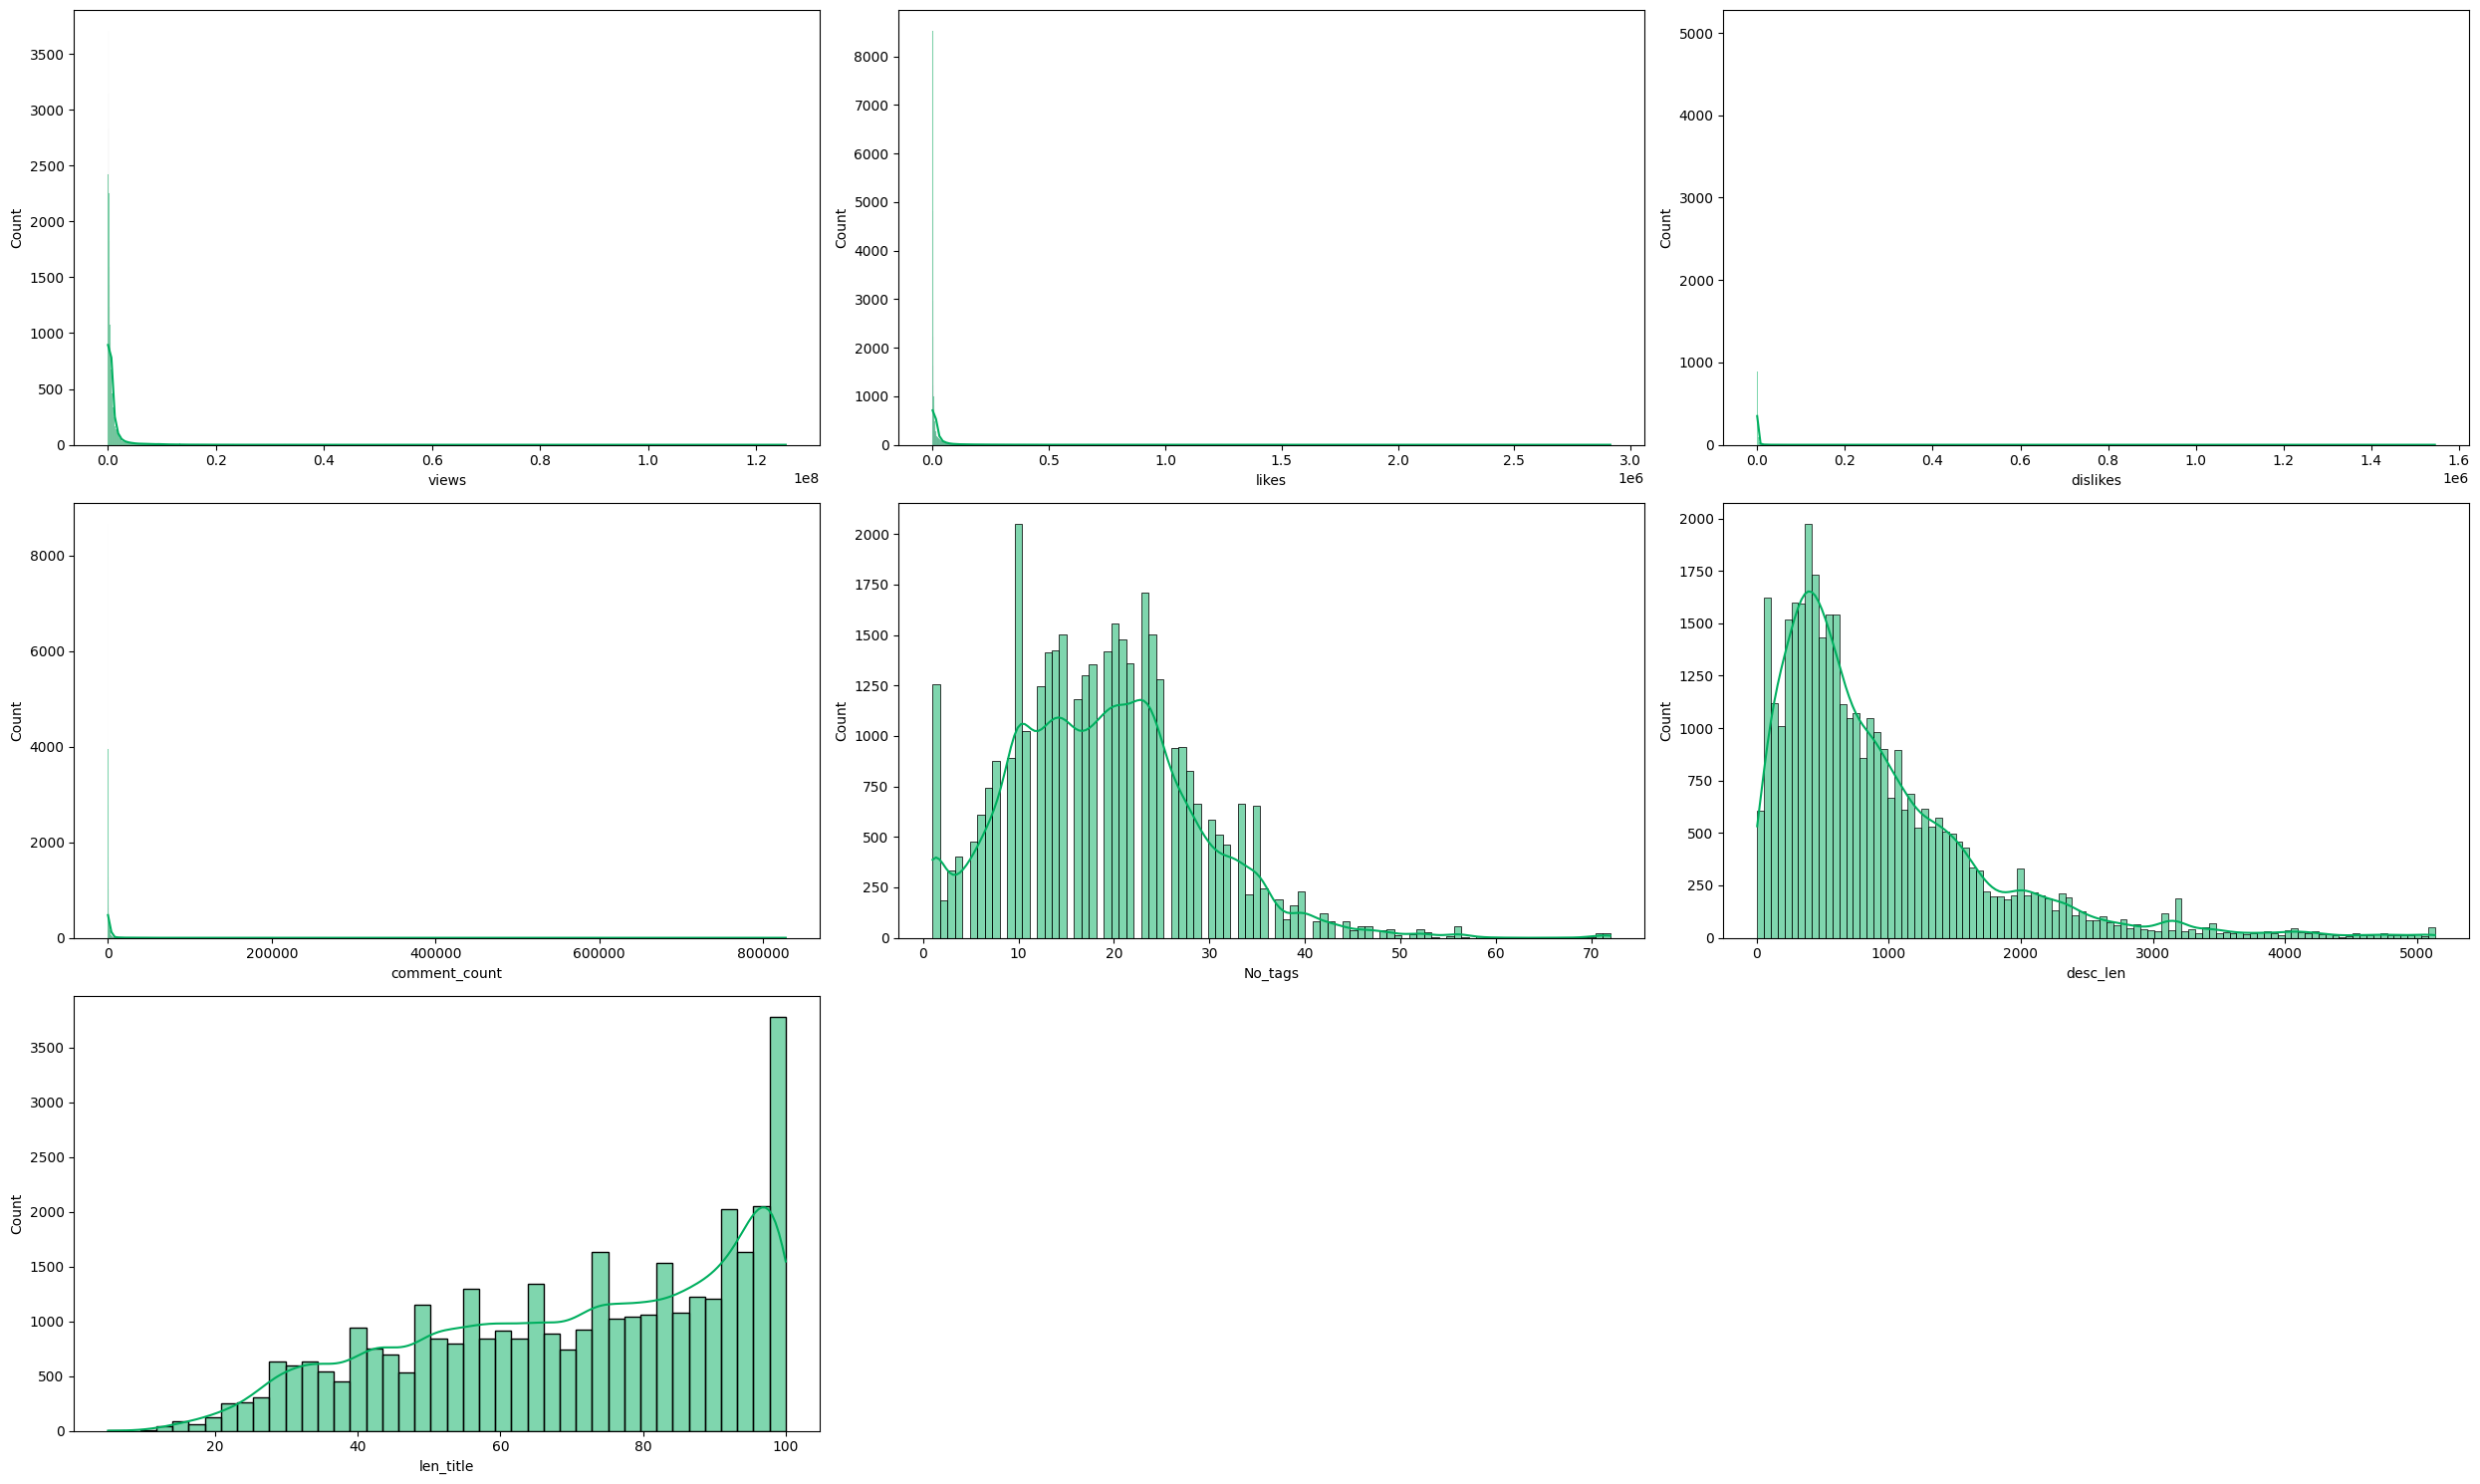

In [ ]:
plt.figure(figsize=(25, 15))
n = 3
for i in range(0, len(num)):
    plt.subplot(n, math.ceil(len(num)/n), i+1)
    sns.histplot(df[num[i]], color='#00af5f', kde=True)
    plt.tight_layout()

Berdasarkan visualisasi univariate di atas, terlihat bahwa pada data num semuanya skewed, dengan detail sebagai berikut:
1. Skewed Positively = views, likes, dislikes, comment_count, No_tags, desc_len
2. Skewed Negatively = len_title

# Multivariate Analysis

<ipython-input-16-93edbc987a6a>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

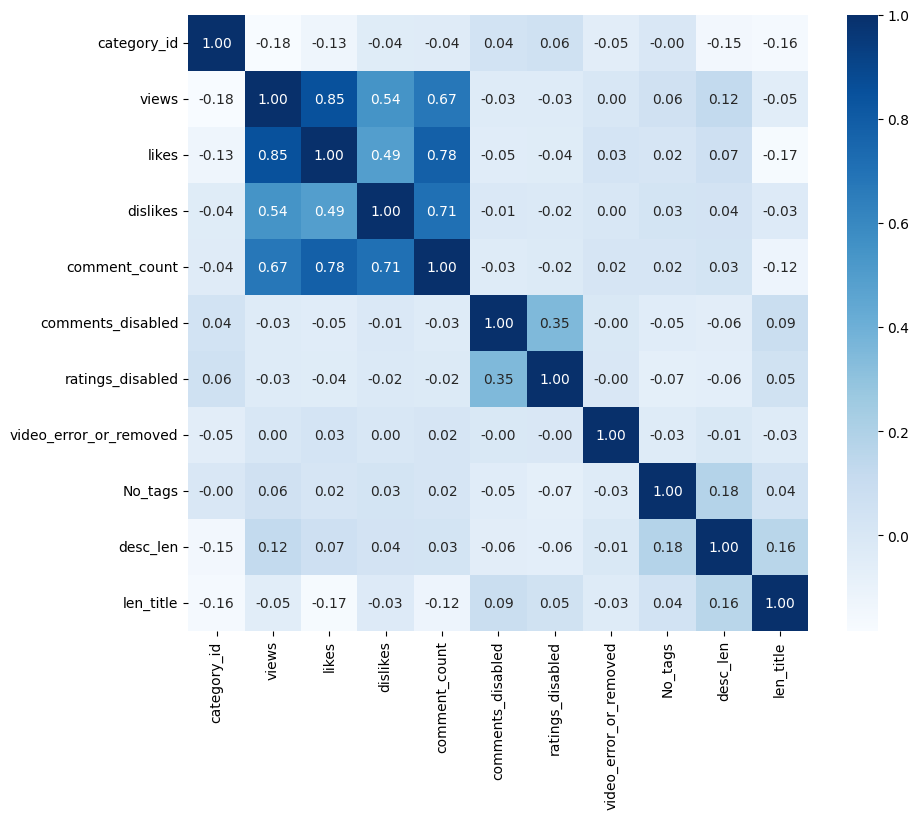

In [ ]:
# Making Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Multivariate Numeric:
- **Tidak terdapat multicollinearity** antara kolom sehingga **semua kolom dapat dipertahankan** atau tidak perlu dieliminasi.
- Terdapat beberapa kolom numerik yang berkorelasi cukup kuat dengan target (`Views`) yang memiliki korelasi positif.
- Kolom numerik yang memiliki **korelasi positif** cukup kuat dengan **target (`Views`)** yaitu **likes(0.85), comment_count(0.67), dislikes(0.54)**.
- **Target (`Views`) memiliki korelasi yang terkuat dengan likes**.

# Data Preparation

Dari hasil EDA yang telah kita lakukan tadi, cukup jelas perlakuan/*pre-processing* apa saja yang harus kita lakukan.

## Missing Value

Data masih punya lumayan banyak missing value. Kita pastikan sekali lagi jumlahnya dengan menggunakan `isna()`.

In [ ]:
df.isna().sum()

trending_date              0
title                      0
channel_title              0
category_id                0
publish_time               0
tags                       0
views                      0
likes                      0
dislikes                   0
comment_count              0
comments_disabled          0
ratings_disabled           0
video_error_or_removed     0
description               45
No_tags                    0
desc_len                   0
len_title                  0
publish_date               0
dtype: int64

Ada baris-baris yang `null`. Berhubung jumlahnya tidak banyak (maksimal sekitar 1-2% dari data), kali ini kita drop saja semua kolom yang `null`.

In [ ]:
df_clean = df.dropna()

In [ ]:
# Menghitung jumlah baris sebelum dropna
total_rows_before = len(df)

# Menghitung jumlah nilai null dalam setiap kolom
null_counts = df.isnull().sum()

# Menampilkan presentase nilai null dalam setiap kolom
print("Presentase nilai null sebelum dropna:")
print((null_counts / total_rows_before) * 100)

# Menghapus baris yang mengandung nilai null
df_clean = df.dropna()

# Menghitung jumlah baris setelah dropna
total_rows_after = len(df_clean)

# Menghitung presentase nilai null dalam setiap kolom setelah dropna
null_counts_after = df_clean.isnull().sum()
print("\nPresentase nilai null setelah dropna:")
print((null_counts_after / total_rows_after) * 100)

# Menampilkan informasi jumlah baris sebelum dan setelah dropna
print("\nJumlah baris sebelum dropna:", total_rows_before)
print("Jumlah baris setelah dropna:", total_rows_after)


Presentase nilai null sebelum dropna:
trending_date             0.000000
title                     0.000000
channel_title             0.000000
category_id               0.000000
publish_time              0.000000
tags                      0.000000
views                     0.000000
likes                     0.000000
dislikes                  0.000000
comment_count             0.000000
comments_disabled         0.000000
ratings_disabled          0.000000
video_error_or_removed    0.000000
description               0.122313
No_tags                   0.000000
desc_len                  0.000000
len_title                 0.000000
publish_date              0.000000
dtype: float64

Presentase nilai null setelah dropna:
trending_date             0.0
title                     0.0
channel_title             0.0
category_id               0.0
publish_time              0.0
tags                      0.0
views                     0.0
likes                     0.0
dislikes                  0.0
comment_

## Duplicate Values

Kita cek apakah ada data yang duplikat dari dataset dengan menggunakan `duplicated` seperti di bawah ini:

In [ ]:
df_clean.duplicated().sum()

4228

In [ ]:
# Menghitung jumlah baris sebelum pembersihan duplikat
total_rows_before = len(df_clean)

# Menghitung jumlah duplikat
duplicates_count = df_clean.duplicated().sum()

# Menghitung presentase duplikat
percentage_duplicates_before = (duplicates_count / total_rows_before) * 100

# Menampilkan hasil
print("Jumlah baris sebelum pembersihan duplikat:", total_rows_before)
print("Jumlah duplikat sebelum pembersihan duplikat:", duplicates_count)
print("Presentase duplikat sebelum pembersihan duplikat:", percentage_duplicates_before, "%")

Jumlah baris sebelum pembersihan duplikat: 36746
Jumlah duplikat sebelum pembersihan duplikat: 4228
Presentase duplikat sebelum pembersihan duplikat: 11.506014260055517 %


In [ ]:
# Menghitung jumlah duplikat sebelum pembersihan duplikat
duplicates_count = df_clean.duplicated().sum()

# Menghitung jumlah unik dari duplikat
unique_duplicates_count = len(df_clean) - duplicates_count

# Menampilkan hasil
print("Jumlah duplikat sebelum pembersihan duplikat:", duplicates_count)
print("Jumlah unik dari duplikat:", unique_duplicates_count)

Jumlah duplikat sebelum pembersihan duplikat: 4228
Jumlah unik dari duplikat: 32518


In [ ]:
# Membersihkan duplikat
df_cleaned = df_clean.drop_duplicates()

# Menghitung jumlah duplikat setelah pembersihan duplikat
duplicates_count_after = df_cleaned.duplicated().sum()

# Menghitung jumlah unik dari duplikat setelah pembersihan duplikat
unique_duplicates_count_after = len(df_cleaned) - duplicates_count_after

# Menampilkan hasil setelah pembersihan
print("\nJumlah duplikat setelah pembersihan duplikat:", duplicates_count_after)
print("Jumlah unik dari duplikat setelah pembersihan duplikat:", unique_duplicates_count_after)


Jumlah duplikat setelah pembersihan duplikat: 0
Jumlah unik dari duplikat setelah pembersihan duplikat: 32518


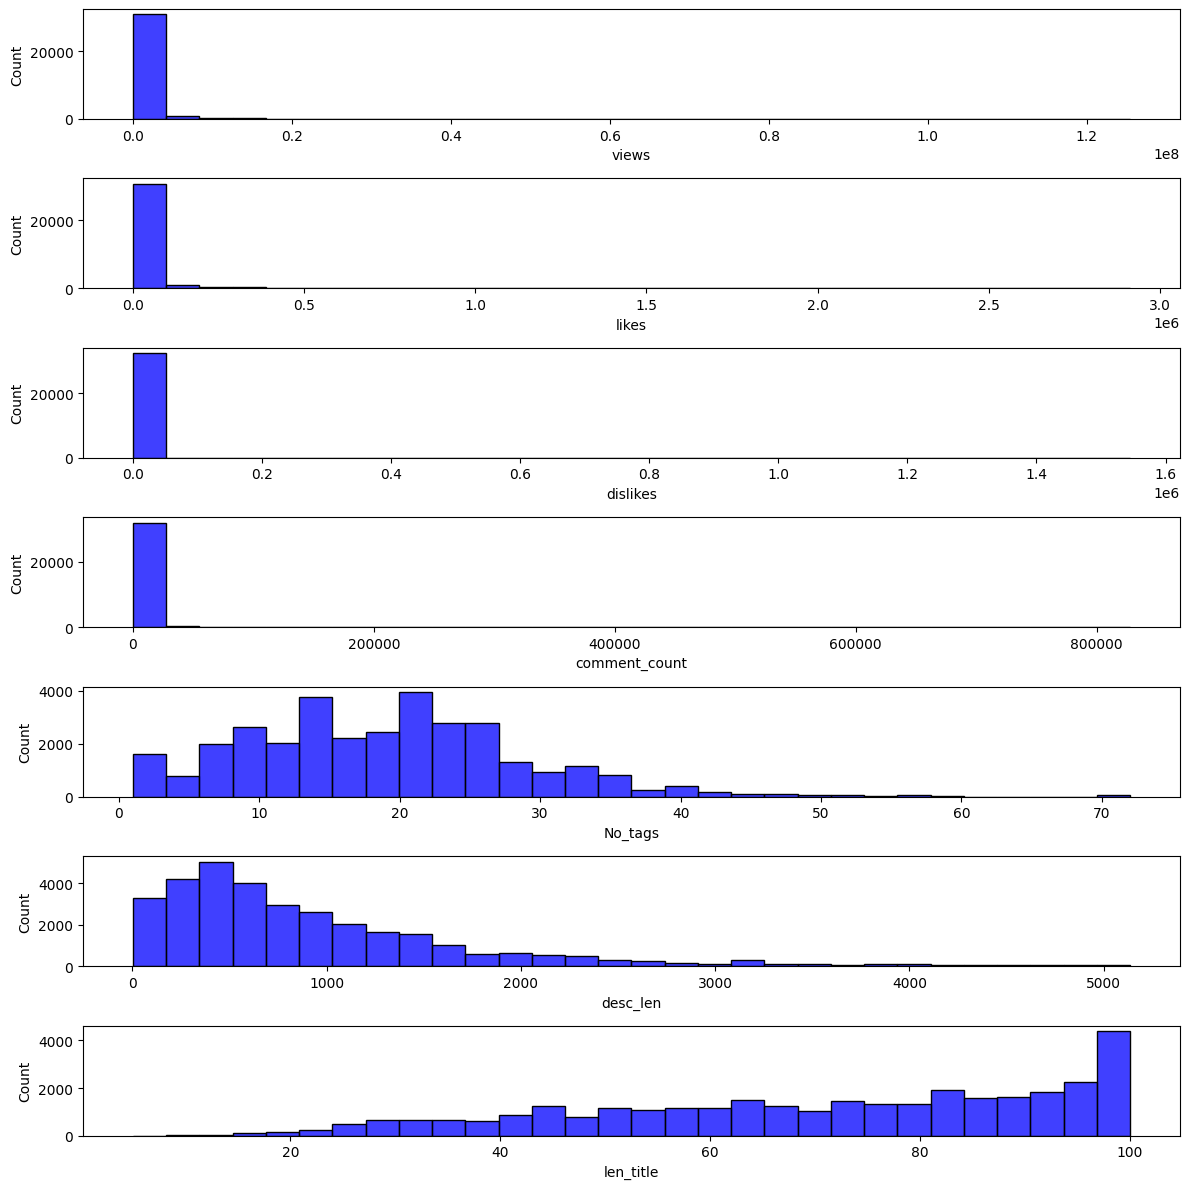

In [ ]:
# Data distribution (visualized in displot)
plt.figure(figsize=(12, 12))

for i in range(0, len(num)):
    plt.subplot(len(num), 1, i+1)
    sns.histplot(data=df_cleaned, x=df_cleaned[num[i]], color='blue', bins=30)

plt.tight_layout()

In [ ]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32518 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           32518 non-null  object        
 1   title                   32518 non-null  object        
 2   channel_title           32518 non-null  object        
 3   category_id             32518 non-null  int64         
 4   publish_time            32518 non-null  object        
 5   tags                    32518 non-null  object        
 6   views                   32518 non-null  int64         
 7   likes                   32518 non-null  int64         
 8   dislikes                32518 non-null  int64         
 9   comment_count           32518 non-null  int64         
 10  comments_disabled       32518 non-null  bool          
 11  ratings_disabled        32518 non-null  bool          
 12  video_error_or_removed  32518 non-null  bool  

Setelah dihandling tidak ada data yang duplikat, sehingga dilanjutkan langsung ke tahap selanjutnya.

## Outliers

Dari grafik yang kita keluarkan ketika EDA, kita tahu bahwa hampir semua kolom numerik memiliki outlier. Sebelum kita mengeluarkan outlier, karena kita tahu bahwa bentuk distribusi kolom-kolom ini condong ke kiri, kita coba normalkan dengan `log transformation` kecuali untuk kolom `'len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed'`:

In [ ]:
# Daftar kolom numerik yang akan diubah
num = ['views', 'likes', 'dislikes', 'comment_count', 'No_tags', 'desc_len', 'len_title']

# Buat salinan DataFrame
df_cleaned_copy = df_cleaned.copy()

# Iterasi melalui kolom numerik
for nums in num:
    # Tambahkan nilai kecil ke setiap elemen yang lebih besar dari 0
    min_value = df_cleaned_copy[df_cleaned_copy[nums] > 0][nums].min() / 2
    # Gunakan .loc pada salinan DataFrame
    df_cleaned_copy.loc[:, nums] = np.log1p(df_cleaned_copy[nums] + min_value)

sekali lagi munculkan Histplot untuk setiap kolom numerik:

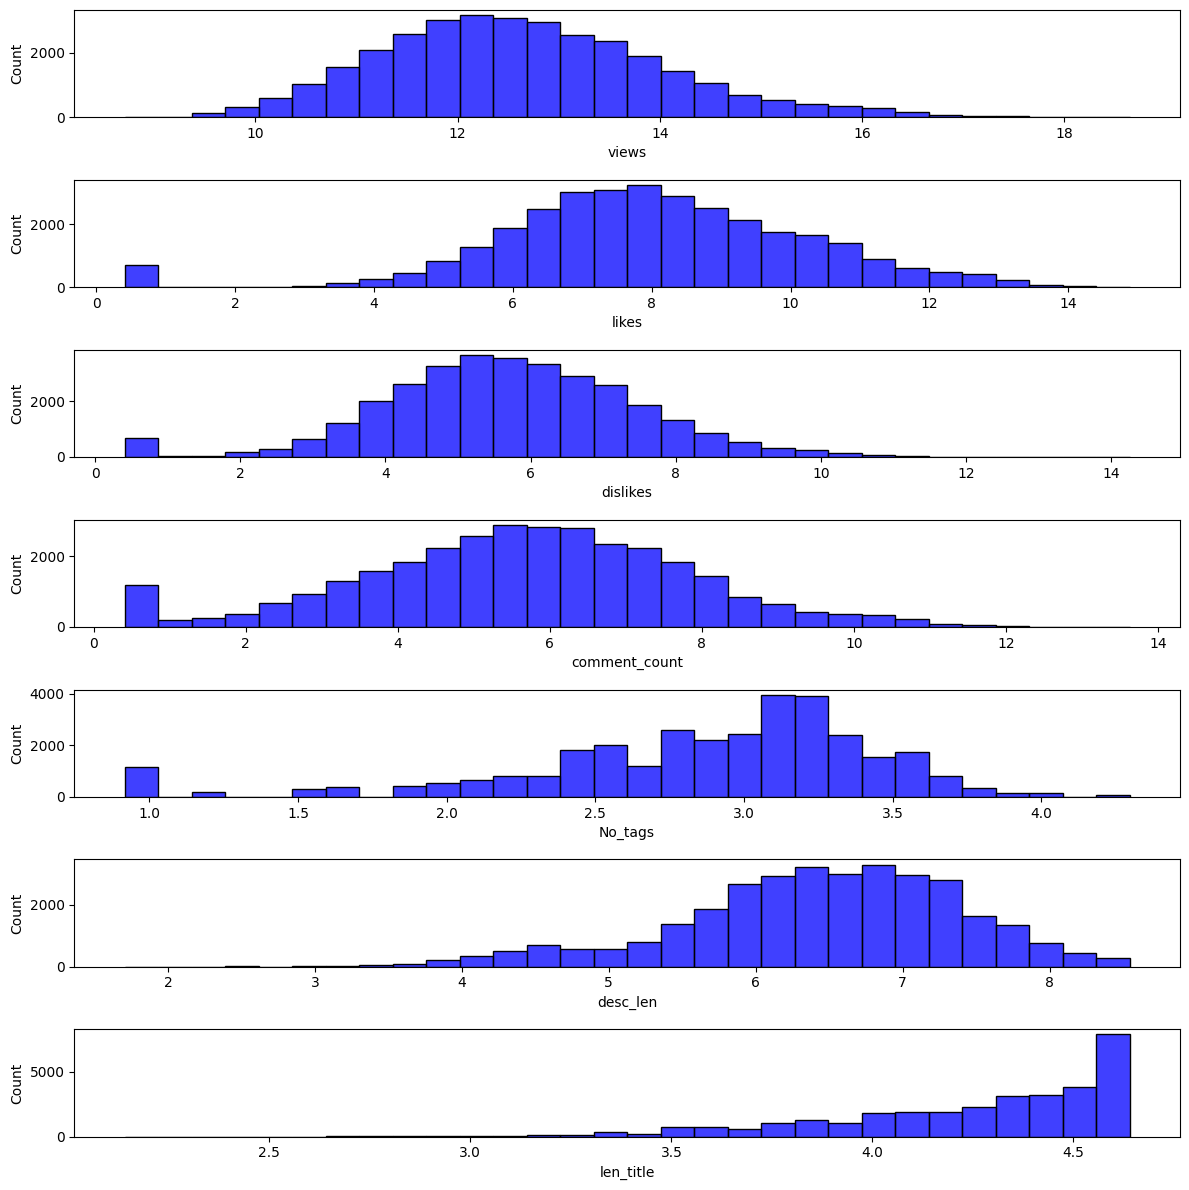

In [ ]:
# Data distribution (visualized in displot)
plt.figure(figsize=(12, 12))

for i in range(0, len(num)):
    plt.subplot(len(num), 1, i+1)
    sns.histplot(data=df_cleaned_copy, x=df_cleaned_copy[num[i]], color='blue', bins=30)

plt.tight_layout()

Sekarang hampir semua kolom numerik terlihat memiliki distribusi berbentuk cukup normal. Untuk distribusi normal, kami  menggunakan *z-score* untuk membuang outlier seperti di bawah ini:

In [ ]:
from scipy import stats

print("Before removing outliers:", len(df_cleaned))

for nums in num:
    if nums not in ['len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
        if nums in df_cleaned_copy.columns:  # Check if the column exists
            z_scores = np.abs(stats.zscore(df_cleaned_copy[nums]))
            df_cleaned_copy = df_cleaned_copy[(z_scores <= 3)]

print("After removing outliers:", len(df_cleaned_copy))


Before removing outliers: 32518
After removing outliers: 30409


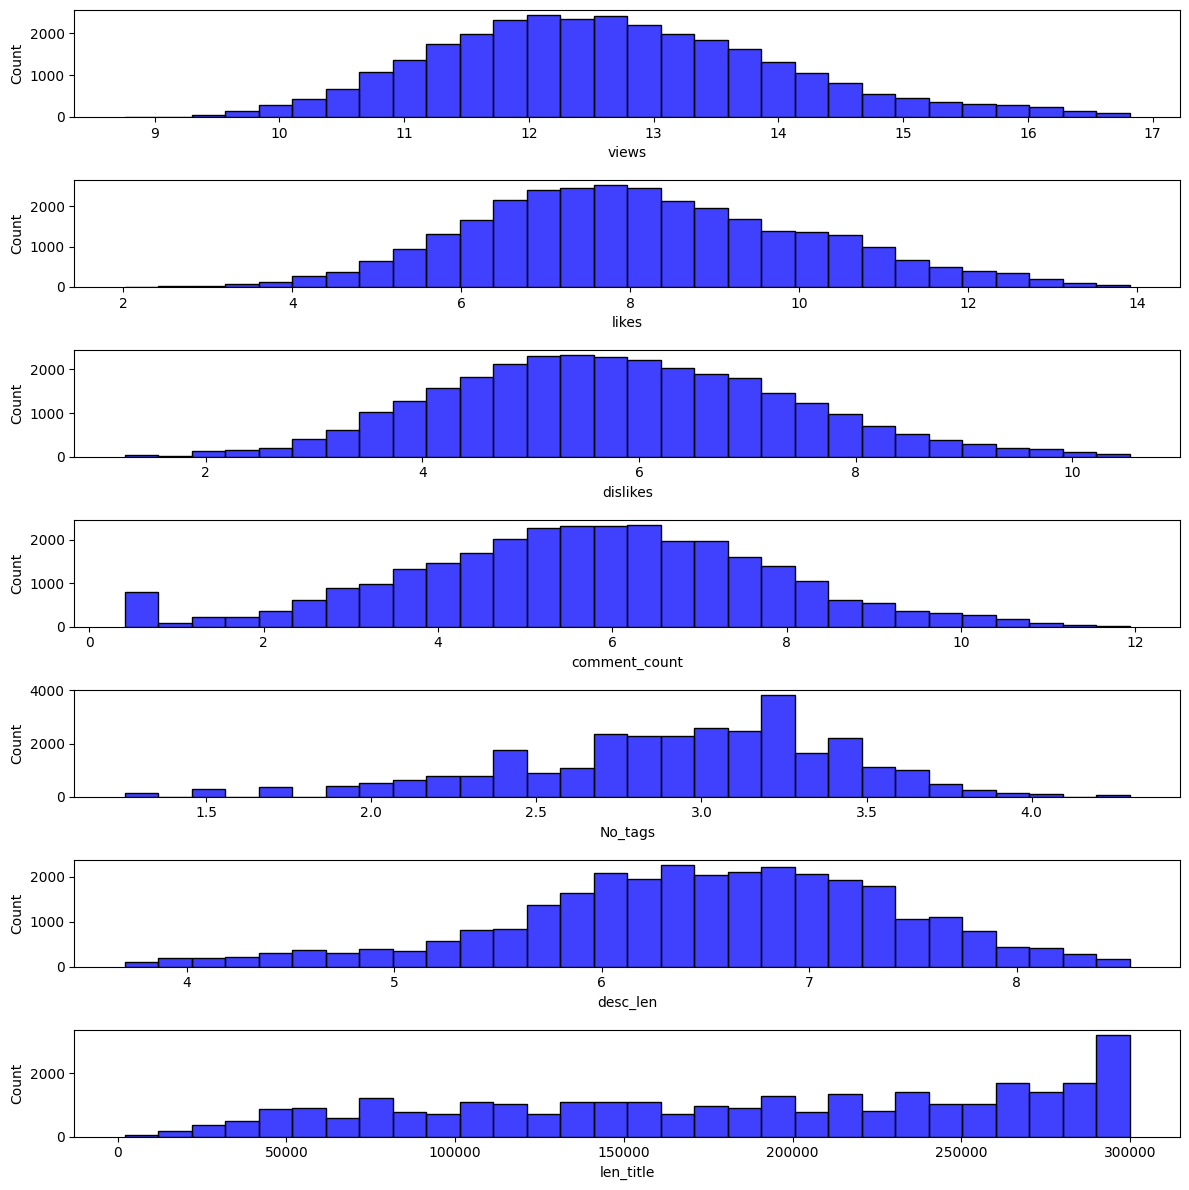

In [ ]:
from scipy.stats import yeojohnson

# Menerapkan transformasi Yeo-Johnson pada 'len_title'
df_cleaned_copy['len_title'], _ = yeojohnson(df_cleaned_copy['len_title'])

# Data distribution (visualized in displot)
plt.figure(figsize=(12, 12))

for i in range(0, len(num)):
    plt.subplot(len(num), 1, i+1)
    sns.histplot(data=df_cleaned_copy, x=df_cleaned_copy[num[i]], color='blue', bins=30)

plt.tight_layout()

In [ ]:
from scipy import stats

print("Before removing outliers:", len(df_cleaned))

for nums in num:
    if nums not in ['len_title', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']:
        if nums in df_cleaned_copy.columns:  # Check if the column exists
            z_scores = np.abs(stats.zscore(df_cleaned_copy[nums]))
            df_cleaned_copy = df_cleaned_copy[(z_scores <= 3)]

print("After removing outliers:", len(df_cleaned_copy))


Before removing outliers: 32518
After removing outliers: 30181


## Normalization/Standardization

Seperti yang telah dijelaskan di atas, semua kolom numerik kita sekarang memiliki bentuk distribusi yang lumayan normal. Oleh karena itu, kita akan melakukan standardisasi ke semua kolom kita seperti di bawah ini:

In [ ]:
from sklearn.preprocessing import StandardScaler

for nums in num:
    df_cleaned_copy[nums] = StandardScaler().fit_transform(df_cleaned_copy[nums].values.reshape(len(df_cleaned_copy), 1))

In [ ]:
df_cleaned_copy.describe().T

,count,mean,std,min,25%,50%,75%,max
category_id,30181.0,2.159617e+01,6.501817,1.000000,23.000000,24.000000,24.000000,43.000000
views,30181.0,-9.417087e-16,1.000017,-2.905685,-0.713237,-0.069866,0.645688,3.003210
likes,30181.0,-1.130050e-16,1.000017,-2.972973,-0.715544,-0.081670,0.672917,2.984193
dislikes,30181.0,2.034091e-16,1.000017,-2.923367,-0.707075,-0.041732,0.686502,2.999909
comment_count,30181.0,2.410774e-16,1.000017,-2.557572,-0.622529,0.035777,0.676857,2.987875
No_tags,30181.0,5.687920e-16,1.000017,-3.034364,-0.576608,0.150751,0.689996,2.832820
desc_len,30181.0,-1.808081e-16,1.000017,-3.019256,-0.593738,0.066150,0.713951,2.296801
len_title,30181.0,2.486111e-16,1.000017,-2.221633,-0.825600,0.119738,0.915860,1.386373


Perhatikan bahwa kolom-kolom numerik kita sekarang memiliki simpangan baku = 1 dan rata-rata mendekati 0.

## Class imbalance
Kita bisa melakukan pengecekan class imbalance dengan menggunakan `value_counts`. Dapat dilihat bahwa perbandingan antara kelas positif dan negatif untuk kolom `views` ada di sekitar 1:3, yang berarti tidak terjadi class imbalance.`

In [ ]:
df_cleaned_copy['views'].value_counts()

 0.098802    3
 0.189523    3
-1.169815    3
-1.061451    3
-0.997756    3
            ..
 0.098669    1
-0.000696    1
 0.901135    1
 0.269703    1
 1.008211    1
Name: views, Length: 29391, dtype: int64

In [ ]:
clean_df = df_cleaned_copy

<ipython-input-36-d9fd785c1e22>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(clean_df.corr(), cmap='Blues', annot=True, fmt='.2f')


<Axes: >

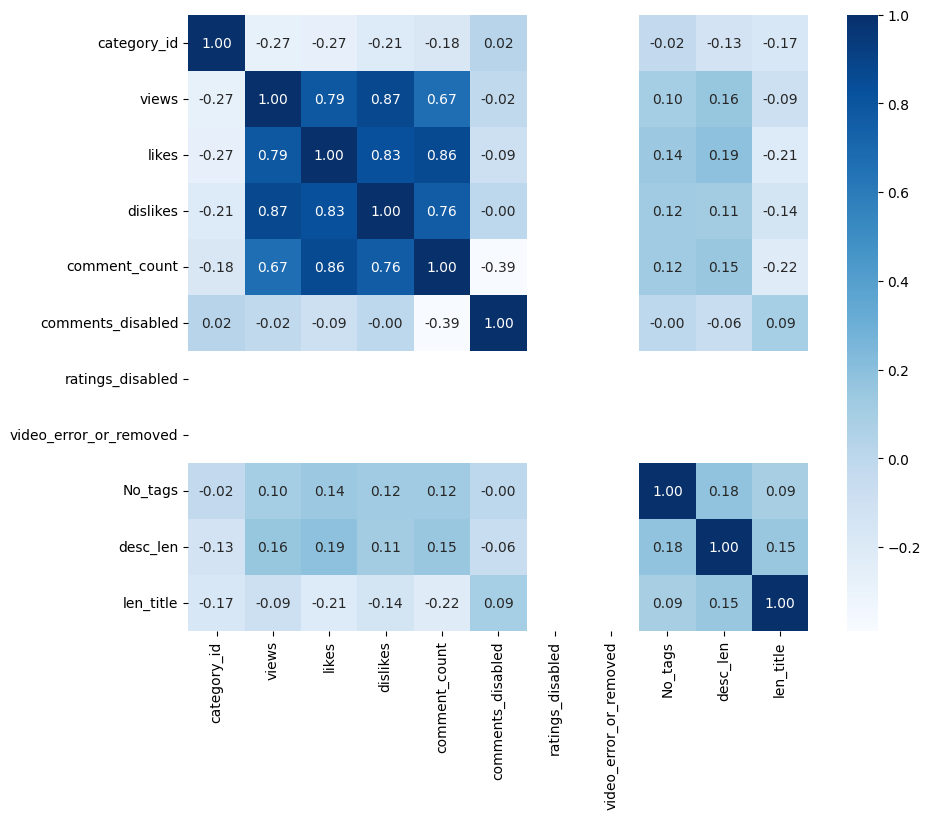

In [ ]:
# Making Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(clean_df.corr(), cmap='Blues', annot=True, fmt='.2f')

**Summary From EDA**
1. Final dataframe name: **clean_df**
2. Target: **views**
2. Untuk menentuka fitur mana yang sebaiknya digunakan dari hasil EDA yaitu **likes, comment_count, dislikes** karena berdasarkan visualisasi heatmap ketiga features tersebut memiliki nilai lebih dari 0.50.

# Feature Engineering

In [ ]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import datasets, ensemble

In [ ]:
# Buat salinan DataFrame
df_Engineering = df_cleaned_copy.copy()

In [ ]:
df_Engineering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           30181 non-null  object        
 1   title                   30181 non-null  object        
 2   channel_title           30181 non-null  object        
 3   category_id             30181 non-null  int64         
 4   publish_time            30181 non-null  object        
 5   tags                    30181 non-null  object        
 6   views                   30181 non-null  float64       
 7   likes                   30181 non-null  float64       
 8   dislikes                30181 non-null  float64       
 9   comment_count           30181 non-null  float64       
 10  comments_disabled       30181 non-null  bool          
 11  ratings_disabled        30181 non-null  bool          
 12  video_error_or_removed  30181 non-null  bool  

#### data type trending_date dan publish_time masih type object dan akan di convert ke datetime type

In [ ]:
# convert trending_date column to datetime type
df_Engineering.trending_date = pd.to_datetime(df_Engineering.trending_date)

# convert publish_time  column to datetime type
df_Engineering.publish_time  = pd.to_datetime(df_Engineering.publish_time)

In [ ]:
# Results to datetime type
df_Engineering.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30181 entries, 0 to 36769
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   trending_date           30181 non-null  datetime64[ns]
 1   title                   30181 non-null  object        
 2   channel_title           30181 non-null  object        
 3   category_id             30181 non-null  int64         
 4   publish_time            30181 non-null  datetime64[ns]
 5   tags                    30181 non-null  object        
 6   views                   30181 non-null  float64       
 7   likes                   30181 non-null  float64       
 8   dislikes                30181 non-null  float64       
 9   comment_count           30181 non-null  float64       
 10  comments_disabled       30181 non-null  bool          
 11  ratings_disabled        30181 non-null  bool          
 12  video_error_or_removed  30181 non-null  bool  

### trending_date sudah menjadi datetime

In [ ]:
# Split `publish_date` column into `year`, `month`, day columns
df_Engineering["year"] = df_Engineering["publish_date"].dt.year
df_Engineering["month"] = df_Engineering["publish_date"].dt.month
df_Engineering['day'] = df_Engineering['publish_date'].dt.day

# Split `trending_date` column into `year`, `month`, day columns
df_Engineering["year"] = df_Engineering["trending_date"].dt.year
df_Engineering["month"] = df_Engineering["trending_date"].dt.month
df_Engineering['day'] = df_Engineering['trending_date'].dt.day

# Convert `category_id` column to `kategori` column
df_Engineering["kategori"] = df_Engineering["category_id"].apply(lambda x: str(x))

# Convert `tags` column to `jumlah_tag` column
df_Engineering["jumlah_tag"] = df_Engineering["tags"].str.split(",").str.len()

# Calculate the average of `likes`, `views`, `comment_count`, and `dislikes` columns
df_Engineering["rata-rata_likes"] = df_Engineering["likes"] / df_Engineering["trending_date"].dt.days_in_month
df_Engineering["rata-rata_views"] = df_Engineering["views"] / df_Engineering["trending_date"].dt.days_in_month
df_Engineering["rata-rata_comment_count"] = df_Engineering["comment_count"] / df_Engineering["trending_date"].dt.days_in_month
df_Engineering["rata-rata_dislikes"] = df_Engineering["dislikes"] / df_Engineering["trending_date"].dt.days_in_month

 # Calculate the number of words in the `title` column
df_Engineering["jumlah_kata_dalam_judul"] = df_Engineering["title"].str.split(" ").str.len()

# Calculate the day of the week
df_Engineering["hari_dalam_minggu"] = df_Engineering["publish_date"].dt.weekday

# Drop `video_error_or_removed` column
data = df_Engineering.drop(columns=["video_error_or_removed"])

# Save the processed data
df_Engineering.to_csv("data_trending_video_processed.csv")


In [ ]:
# Add `channel_id` column
df_Engineering["channel_id"] = df_Engineering["channel_title"].apply(lambda x: str(x))

# Add `ratings_disabled` and `comments_disabled` columns
df_Engineering["ratings_disabled"] = df_Engineering["ratings_disabled"].astype("bool")
df_Engineering["comments_disabled"] = df_Engineering["comments_disabled"].astype("bool")

# Add `video_error_or_removed` column
df_Engineering["video_error_or_removed"] = df_Engineering["video_error_or_removed"].astype("bool")

In [ ]:
# Load processed data
df_data = pd.read_csv("data_trending_video_processed.csv")

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_data, df_data['views'], test_size=0.25)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)


ValueError: ignored